# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Para leer el conjunto de datos en los DataFrames, primero es neceseraio importar las librias y luego leer los archivos. Al mismo tiempo es necesario verificar la lectura y visualización de los datos ya cargados para determinar si no tienen problemas.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames
instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
order = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
instacart.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# mostrar información del DataFrame
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# mostrar información del DataFrame
order.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Para el paso 1, podemos afirmar con certeza que al leer los conjuntos de datos en los DataFrames se encontraron problemas de lecutura y visualización de datos en los archivos CSV. Para solucionar los problemas con archivos CSV fue necesario el uso del parámetro SEP= para cambiar el delimitador de los encabezados de las columnas.




# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

El plan de desarrollo de solución para el paso 2 que hace referencia al procesamiento de los datos. Es neceseario aplicar alugnos metodos para determinar valores duplicados y tambien para la eliminiación de datos duplicados. Se usará del método duplicated() que busca filas duplicadas en un DataFrame, tambien se aplicará el método drop_duplicates() para eliminar registros duplicados del DataFrame y por último se haran una compararación de los pedidos que se llevarón acabo el miércoles a las 2:00 a.m.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(instacart.duplicated().sum()) 


15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí, se encontraron 15 filas duplicadas gracias al método duplicated() que es una función que se encarga de encontrar elementos duplicados.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart[(instacart['order_dow'] == 3) & (instacart['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
 
 Con base a los hallazgo, este resultado refleja que se hicieron 121 pedidos el día miércoles en el horario de 2:00 a.m.

In [10]:
# Elimina los pedidos duplicados
instacart = instacart.drop_duplicates().reset_index(drop= True)
print(instacart.duplicated().sum()) 

0


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart.duplicated().sum()) 

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
#print(df1['order_id'].value_counts())
pedidos = instacart['order_id'].isnull()
instacart[pedidos]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos

Con respecto a este a este dataframe, se puede decir que se encontraron 15 filas duplicadas haciendo el uso del método duplicated() y al mismo tiempo se eliminaron los pedidos duplicados a través del método drop_duplicates(), finalmente se verifico otra vez si habían duplicados y esto mostro un resultado negativo.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum()) 

0


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
prod = products['product_name'].isnull()
products[prod]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products['product_name'])


0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
faltantes = products['product_name'].isnull()
products[faltantes]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al prinicipio se verifico que si habian filas duplicadas a través del método duplicated() y esto arrojo un resultado 0. Luego se encontraron id duplicados de productos usando el método isnull() y finalmente para determinar con certeza se convirtieron los nombres a mayúsculas para comrobar mejor los hallazgos. 

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum()) 

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
#print(df3['department_id'].value_counts())
dep = departments['department_id'].isnull()
departments[dep]

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para el departments data frame no hubo filas duplicas ni tampoco IDs de productos y lo que se hizo fue usar el métod duplicated() para determinar si habína duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum()) 

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
#print(df3['department_id'].value_counts())
pasillo = aisles['aisle_id'].isnull()
aisles[pasillo]

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este caso el aisles data frame no cuenta con ninguna fila duplicada ni tampoco IDs duplicados de productos, el proceso fue muy sencillo, unicamente su uso el método duplicated() y tambien el método isnull().

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order.duplicated().sum()) 

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
#print(df5['order_id'].value_counts())
order_prod = order['order_id'].isnull()
order[order_prod]

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Por último, se utilizo el mismo proceso con el order_products data frame no cuenta con ninguna fila duplicada y se procedio a revisar nuevamente y no se encontro ningún valor duplicado engañoso, el proceso fue muy sencillo, unicamente su uso el método duplicated() y tambien el método isnull().

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
ausentes= products['product_name'].isnull()
products[ausentes]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

A continuación, se encontraron 1258 valores ausentes en la columna 'product_name'. Al momento de realizar el hallazgo se utilizó el método isnull() la cual detecta valores faltantes.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
(products[(products['product_name'].isna()) & (aisles['aisle_id'] == 100)]).isna()


,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

Para este proceso no se encontro ningún producto ausente que este relacionado con el pasillo con ID 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
(products[(products['product_name'].isna()) & (departments['department_id'] == 21)]).isna()


,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.
Para este proceso no se encontro ningún producto ausente que este relacionado con el departamento con ID 21.

Se agregan 2 celdas para poder filtrar las tablas department y pasillos

In [26]:
filtro_pasillo = aisles[aisles['aisle_id'] == 100]
filtro_pasillo.head()

,aisle_id,aisle
99,100,missing


In [27]:
filtro_dep = departments[departments['department_id'] == 21]
filtro_dep.head()

,department_id,department
20,21,missing


In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
filtro_pasillo = products['aisle_id'] == 100
filtro_dep = products['department_id'] == 21
filtro_result = products[filtro_pasillo & filtro_dep]
print(filtro_result)


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

A continuación, se observa que hay 1258 filas que tienen relación con el aisle_id 100 y el department_id 21. Al mismo tiempo se puede observar la columna product_name  que cuenta con valores ausentes.

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'
columns_to_replace = ['product_name']

for col in columns_to_replace:
    products[col].fillna('unknown', inplace=True)
    
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para este proceso fue necesario sustituir 'Unknown' en la columna product_name para rellenar los valores ausentes. Par solucionar, fue necesario aplicar un for y el método fillna() la permite sustituir los valores nulos de una estructura o columna y como resultado se logro obtener que todos las columnas no cuentan con ningun valor ausente.

### `orders` data frame

In [30]:
# Encuentra los valores ausentes
print(instacart['days_since_prior_order'].isna().sum())

28817


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
valor_ausente = instacart[instacart['order_number'] != 1].isnull()
instacart[valor_ausente]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
478947,NaN,NaN,NaN,NaN,NaN,NaN
478948,NaN,NaN,NaN,NaN,NaN,NaN
478949,NaN,NaN,NaN,NaN,NaN,NaN
478950,NaN,NaN,NaN,NaN,NaN,NaN


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al momento de resolver este problema, el orders data frame contaba con 28817 valores ausentes y al mismo tiempo se logro encontrar valores ausentes que son distinto al primer pedido. Lo que se hizo fue usar metodo isna(), la cual se utiliza para detectar valores faltantes y el uso del método isnull().

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
print(order['add_to_cart_order'].isna().sum())

836


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order['add_to_cart_order'].min())
print(order['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

Los hallazgos en este order_products data frame, se lograron encontrar valores ausentes en la columna 'add_to_cart_order' y asimismo se encontraron los valores máximos y minimos en la dicha columna.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ped_ausentes = order[order['add_to_cart_order'].isnull()]
order['add_to_cart_order']

0          17.0
1           1.0
2           1.0
3          35.0
4           5.0
           ... 
4545002    12.0
4545003     9.0
4545004     4.0
4545005     8.0
4545006     9.0
Name: add_to_cart_order, Length: 4545007, dtype: float64

In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

ausentes_order= list(order[order["add_to_cart_order"].isna()]["order_id"].unique())
min_order= order[order["order_id"].isin(ausentes_order)].groupby("order_id")["product_id"].count()
print(min_order)

minimo = min_order.min()
print()
print(minimo)

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

65


Describe brevemente cuáles son tus hallazgos.

A continuación, se describe brevemente sobre los hallazgos efectuados en los siguentes enunciados: primeramente, se guradaron los IDs de los pedidos que tenían un valor ausente en la columna 'add_to_cart_order', dicho proceso fue efectuado a través del método isnull(). Luego, se listaron los productos con valores ausentes que tienen mas de 64 productos, después, se agrupo todos los pedidos con datos ausentes por su ID de pedido y por último se hizo el número de la columna 'product_id' en cada pedido y al mismo tiiempo se obtuvo el valor mínimo del conteo.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
columns_to_replace = ['add_to_cart_order']

for col in columns_to_replace:
    order[col].fillna(999, inplace=True)
    
print(order.isna().sum().astype(int))


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para este proceso fue necesario reemplazar los valores ausentes en la columna 'add_to_cart con el dato de sustitución 999 y a la vez se convirtio la columna a tipo entere. Asimismo, se logro demostrar las columnas de toda la tabla sin valores ausentes y todos fueron rellenado a través del método fillna().

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

El procesamiento de datos es de mucha importancia para las empresas debido a que contribuyen a la organización que sea más efeciente. Asimismo, es de suma importancia hacer una limpieza a los datos y para efectuar este proceso es necesario encontrar, valores ausentes, valores duplicados, eliminarlo o reemplazarlo dependiendo las decisiones que se deben de tomar dentro de la organización.



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
instacart['order_hour_of_day'].sort_values().unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [38]:
instacart['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

Escribe aquí tus conclusiones

Según los resultados obtenidos, se concluye que que los valores en la columna 'order_hour_of_day' son sensibles debido que oscilan entre los rangos de 0 a 23 que es el horario habitual de un día. Tambien, podemos concluir que los valores que se encuentran en la columna 'order_dow' son razonables ya que oscilan entre 0 y 6 que respresentan los días de la semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

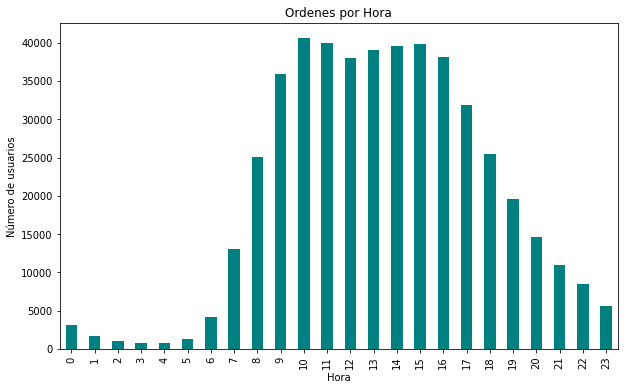

In [39]:
df_horas = instacart.groupby('order_hour_of_day')['order_number'].count()
df_horas
df_horas.plot(x= 'order_hour_of_day',
             y= 'order_number',
             title= 'Ordenes por Hora',
             xlabel= 'Hora',
             ylabel= 'Número de usuarios',
             kind= 'bar',
             color = 'teal',
             figsize= [10,6],
             legend= False)

plt.show()

Escribe aquí tus conclusiones

Con base a la información que se visualiza en la gráfica se puede asegurar con certeza que el número de personas que hacen pedidos dependiendo de la hora del día es la siguiente:

El pico más alto de pedido se hace a las 10:00 a.m. con un aproximado de 40000 mil personas por hora.

Existe un grupo de personas y su gran mayoria que realiza los pedidos entre los horarios de 9:00 a.m., 11:00 a.m. a 16:00 p.m. y la cantidad de personas oscilan entre 30000 mil a 40000 mil personas.

Y por último se puede visualizar que entre los horarios de 1:00 a.m. a 5:00 a.m. se realizan los pedidos y con una catidad de personas de 1 a 5000 mil personas.

### [A3] ¿Qué día de la semana compran víveres las personas?

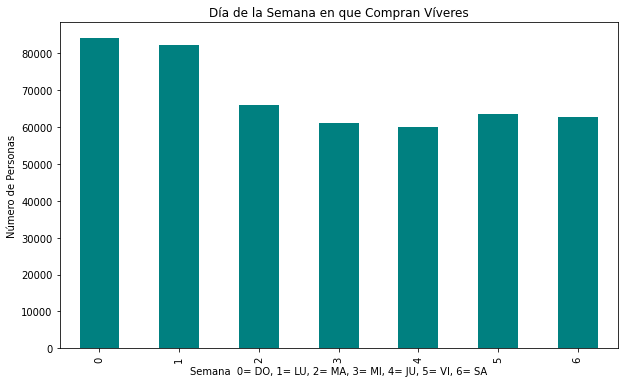

In [40]:
df_semana = instacart.groupby('order_dow')['order_number'].count()
df_semana
df_semana.plot(x= 'order_dow',
             y= 'order_number',
             title= 'Día de la Semana en que Compran Víveres',
             xlabel= 'Semana  0= DO, 1= LU, 2= MA, 3= MI, 4= JU, 5= VI, 6= SA',
             ylabel= 'Número de Personas',
             kind= 'bar',
             color = 'teal',
             figsize= [10,6],
             legend= False)

plt.show()

Escribe aquí tus conclusiones

Con base a la información analizada que refleja la gráfica, se puede concluir con firmeza que las personas prefieren el día domingo(ó 0)  hacer las compras de sus vivires.

También, se puede visualizar que que exite una minoria de personas que prefiere hacer sus compras el día jueves, mientras que el resto lo hace durante los días de las emana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

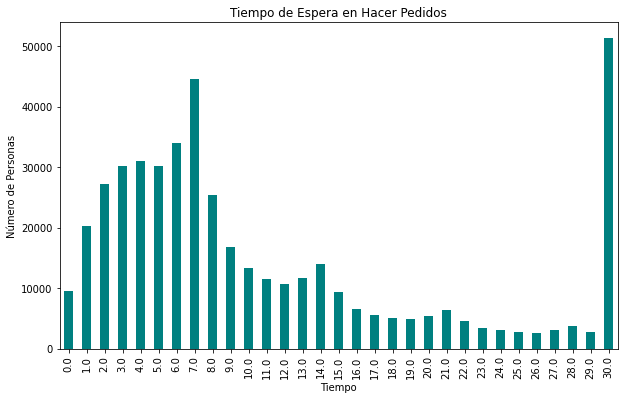

In [41]:
df_tiempo = instacart.groupby('days_since_prior_order')['order_number'].count()
df_tiempo
df_tiempo.plot(x= 'days_since_prior_order',
             y= 'order_number',
             title= 'Tiempo de Espera en Hacer Pedidos',
             xlabel= 'Tiempo',
             ylabel= 'Número de Personas',
             kind= 'bar',
             color = 'teal',
             figsize= [10,6],
             legend= False)

plt.show()

Escribe aquí tus conclusiones

Según los resultados que se visualiza en la gráfica, se puede concluir con certeza que las personas se tardan en hacer otro pedido entre 30 horas que sería el timpo mas alto y mientras que el tiempo minimo es de 25 horas.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [42]:
df_miercoles =instacart[instacart['order_dow'] == 3]
df_sabado = instacart[instacart['order_dow'] == 6]

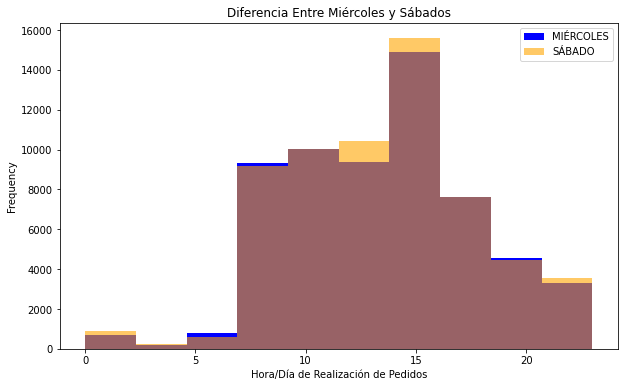

In [43]:
df_miercoles['order_hour_of_day'].plot(kind= 'hist', color= 'blue', title= 'Diferencia Entre Miércoles y Sábados')
df_sabado['order_hour_of_day'].plot(kind= 'hist', alpha= 0.6, color= 'orange', figsize= [10,6])
plt.xlabel('Hora/Día de Realización de Pedidos')
plt.legend(['MIÉRCOLES', 'SÁBADO'])
plt.show()


Escribe aquí tus conclusiones

Con base a la información que arroja la gráfica, se concluye que si xiste alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados. Se observa que el día sábado cuenta con una mayor frecuencia a comparación del día miercoles que existe una minima frecuencia por horas al día que se realiza un pedidol

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

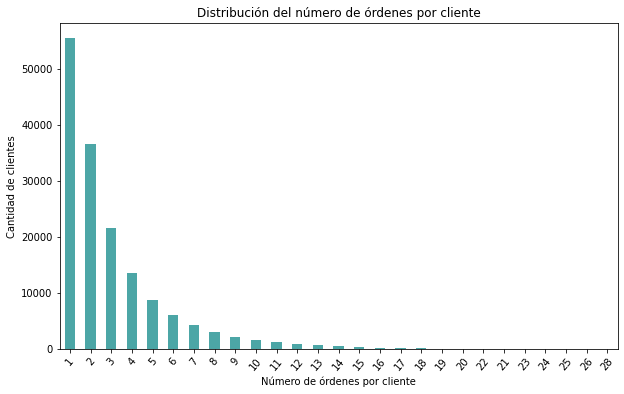

In [44]:
orden_user = instacart.groupby('user_id')['order_id'].count().value_counts()
orden_user.plot(kind = 'bar',
                     title='Distribución del número de órdenes por cliente',
                     figsize=[10, 6],
                     color='teal',
                     rot= 50,
                     xlabel='Número de órdenes por cliente',
                     ylabel='Cantidad de clientes',
                     alpha=0.7
                    )
plt.show()

Escribe aquí tus conclusiones

Según la información obtenida y tal como se refleja en la gráfica, se puede concluir que el número de órdenes que hacen los clientes  por día están de la siguiente manera: Más de 50 mil clientes realizan 1 pedido, mientras que 1 a 35000 mil clientes realiza de 2 a 18 pedidos.



### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

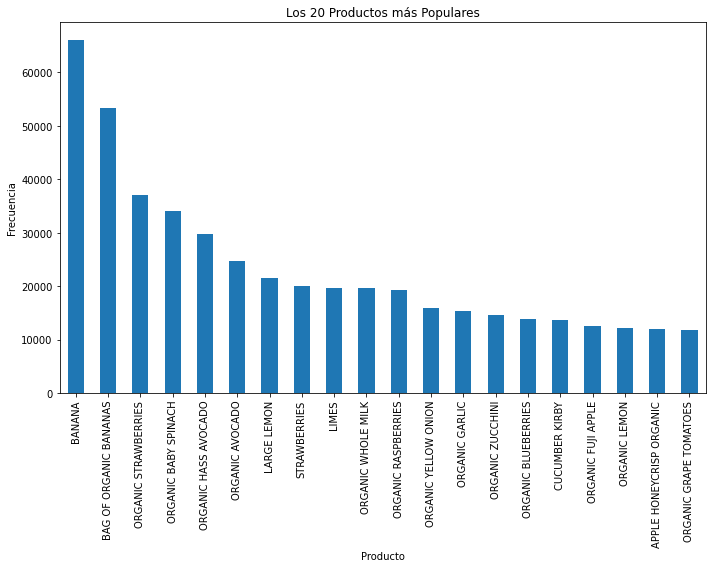

In [45]:
top_product = order.merge(products, on='product_id')
top_product_info = top_product.groupby('product_name')['product_id'].count().sort_values(ascending=False).head(20)
top_product_info.plot(kind='bar', figsize=(10, 8))

plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Los 20 Productos más Populares')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

Con base a la información que se visualiza en la gráfica, se puede concluir que los 20 productos más populares que prefieren los usuarios son algunas que van de mayor a menor. El producto más popular es la BANANA y el menos popular es ORGANIC GRAPE TOMATOES siempre haciendo enfasis a los 20 productos que se muestran en la gráfica.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

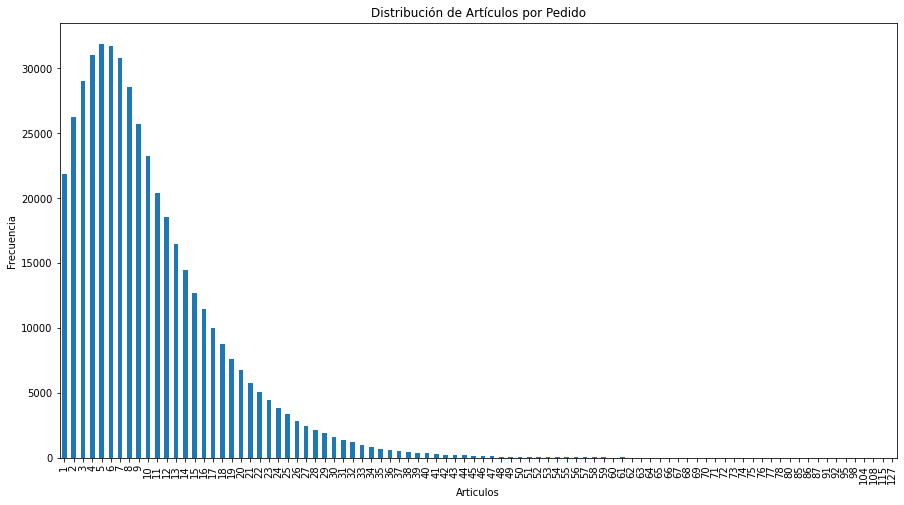

In [46]:
pedidos = order.groupby('order_id')['product_id'].count().value_counts().sort_index()

pedidos.plot(kind='bar',
             figsize=[15, 8],
             xlabel='Articulos',
             ylabel='Frecuencia',
             title='Distribución de Artículos por Pedido',
            )
plt.show()

Escribe aquí tus conclusiones

Según los datos que arroja la gráfica, se puede afirmar con certeza que la cantidad de artículos que compran normalmente las personas en un pedido es de aproximadamente  5.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

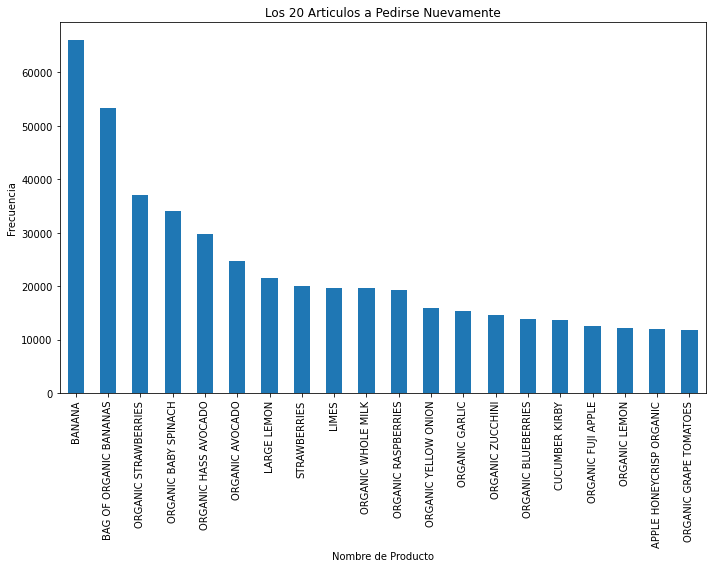

In [47]:
top_articulo = order.merge(products, on='product_id')
top_articulo_info = top_articulo.groupby('product_name')['reordered'].count().sort_values(ascending=False).head(20)
top_articulo_info.plot(kind='bar', figsize=(10, 8))

plt.xlabel('Nombre de Producto')
plt.ylabel('Frecuencia')
plt.title('Los 20 Articulos a Pedirse Nuevamente')
plt.tight_layout()
plt.show()

In [48]:
top_articulo

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7.0,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4.0,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8.0,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23.0,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14.0,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10.0,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2.0,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1.0,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


Escribe aquí tus conclusiones

Con base a la información que se visualiza en la gráfica, se puede concluir que los 20 articulos más populares que prefieren los usuarios, son algunas que van de mayor a menor. El producto más popular es la BANANA y el menos popular es ORGANIC GRAPE TOMATOES siempre haciendo enfasis a los 20 articulos que se muestran en la gráfica.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [49]:
frecuencia_producto = (order.groupby('product_id')['reordered'].mean())*100
frecuencia_producto

product_id
1        56.428571
2         0.000000
3        73.809524
4        51.020408
7        50.000000
           ...    
49690    80.000000
49691    43.055556
49692    41.666667
49693    44.000000
49694    33.333333
Name: reordered, Length: 45573, dtype: float64

Escribe aquí tus conclusiones

Con base a la información obtenida, se puede afirmar con certeza que laa proporción de las veces que se pide y que se vuelve a pedir un producto es de 80 que sería el valor más alto.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [50]:
df_merged = pd.merge(instacart, order)

frecuencia_cliente = (df_merged.groupby('user_id')['reordered'].mean())*100
frecuencia_cliente

user_id
2          3.846154
4          0.000000
5         66.666667
6          0.000000
7         92.857143
            ...    
206203    22.222222
206206    71.428571
206207    89.130435
206208    69.600000
206209    32.000000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

Con respecto a la información obtenida, se puede observar que la proporción de productos pedidos es de 100 que sería el valor máximo de proporción del producto a pedir.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [51]:
df_merged = pd.merge(order, products)
principales = order[order['add_to_cart_order'] == 1]
principales= df_merged.groupby('product_name')['product_id'].size().sort_values(ascending=False).head(20)
principales

product_name
BANANA                      66050
BAG OF ORGANIC BANANAS      53297
ORGANIC STRAWBERRIES        37039
ORGANIC BABY SPINACH        33971
ORGANIC HASS AVOCADO        29773
ORGANIC AVOCADO             24689
LARGE LEMON                 21495
STRAWBERRIES                20018
LIMES                       19690
ORGANIC WHOLE MILK          19600
ORGANIC RASPBERRIES         19197
ORGANIC YELLOW ONION        15898
ORGANIC GARLIC              15292
ORGANIC ZUCCHINI            14584
ORGANIC BLUEBERRIES         13879
CUCUMBER KIRBY              13675
ORGANIC FUJI APPLE          12544
ORGANIC LEMON               12232
APPLE HONEYCRISP ORGANIC    11993
ORGANIC GRAPE TOMATOES      11781
Name: product_id, dtype: int64

Escribe aquí tus conclusiones

Conforme a la información analizada, se puede decir con certeza que los primeros prouducto que se agrega al carrito de compra son todos aquellos que los usuarios agregan a su carrito de compra, siendo estos 20 principales: BANANA, BAG OF ORGANIC BANANAS, ORGANIC STRAWBERRIES... ORGANIC LEMON, APPLE HONEYCRISP ORGANIC, ORGANIC GRAPE TOMATOES, tal como se visualiza en la tabla de datos.

### Conclusion general del proyecto:

Con base a la información que fue analizada se concluye que la manipulación de datos, es un paso fundamental y de mucha importancia para la organización debido que contribuye a la toma de decisiones dentro de la empresa, basandose a través de una limpieza de datos, análisis de datos la cual consta en representar información usando gráficos estadísticos y combinar múltiples conjuntos de datos. De igual modo, se puede observar que la gran mayoría de usuarios prefiere hacer compras los domingos y resto lo hace durante el transcurso de la semana, tambien se determinó cuales son los 20 principales productos que normalmente prefiere el cliente y por ultimo se observo sobre la proporción de veces que se vuelve a pedir un producto.

